##Problem Statement 1
Build a text classification RNN ( Recurrent Neural Network) model using IMDB dataset. Import the IMDB dataset using  tensorflow_datasets and perform the following tasks.

**Tasks to be Performed:**
1.	Import the required libraries
2.	Shuffle the data for training and create batches of text and label pairs
3.	Encode the text data
**Note:** The simplest way to process text for training is using the TextVectorization layer.
Create the layer, and pass the dataset's text to the layer's .adapt method.
4. Build a sequential model using tf.keras.Sequential function
5. Compile the model
6. Train the model using train dataset
7. Test the data using tset dataset and evaluate the model by passing a sentence
**Note:** If the prediction is >= 0.0, it is positive else it is negative.




Importing the required libraries.

In [ ]:
#Task 1:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

Importing matplotlib and creating a function to plot graphs.

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

Importing the IMDB dataset using tensorflow_datasets.

The IMDB  review dataset is a binary classification dataset. All the reviews have either a positive or negative sentiment.

In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2T4U9P/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2T4U9P/imdb_reviews-test.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2T4U9P/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

Printing the data and labels from the dataset for example.

Shuffling the data for training and create batches of text and label pairs.


In [ ]:
#Task 2:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
for example_data, label in train_dataset.take(1):
  print('texts: ', example_data.numpy()[:1])
  print()
  print('labels: ', label.numpy()[:1])

texts:  [b"It is nice to see the likes of Oliver Stone, Brian DePalma, Al Pacino, and even Michelle Pfiefer make one monumental piece of cinematic garbage. It is nice to see people so rich and 'successful' wasting their time on one of the most forgettable, trite, and pathetic pieces of film-making of all time. This movie represents the worst of Hollywood.<br /><br />What is this? Is it based on a true story. Well, they do start with some basic news bites and facts that they read off USA today. But then the movie departs to some fantasy world and a 'cuban' refugee going to make it in the American drug subculture; kind of like Rocky on cocaine. Is it a movie about Cuba or Cubans? For the life of me I don't believe there is a single Cuban in this movie. The accents are totally fake, and scene with Antonio's mother looks like a poster for midwest American values. The whole scene looks like something out of the Dick Van Dyke show. Is this movie about Miami? It looks more like L.A. transpose

Encoding the text data.

The simplest way to process text for training is using the TextVectorization layer.
Create the layer, and pass the dataset's text to the layer's .adapt method.

In [ ]:
#Task 3:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

Using .adapt method setting the layer's vocabulary.

Here are the first 10 tokens. After the padding and unknown tokens they're sorted by frequency.

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:10]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it'],
      dtype='<U14')

Build a sequential model using tf.keras.Sequential function.


The first layer is the encoder, which converts the text to a sequence of token indices.

After the encoder is an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices to sequences of vectors. These vectors are trainable. After training (on enough data), words with similar meanings often have similar vectors.

This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a tf.keras.layers.Dense layer.

A recurrent neural network (RNN) processes sequence input by iterating through the elements. RNNs pass the outputs from one timestep to their input on the next timestep.

The tf.keras.layers.Bidirectional wrapper can also be used with an RNN layer. This propagates the input forward and backwards through the RNN layer and then concatenates the final output.

In [ ]:
#Task 4:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

Compile the Keras model to configure the training process:

In [ ]:
#Task 5:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

Train the model by mentioning the epoch size one for simplicity.

In [ ]:
#Task 6:
history = model.fit(train_dataset, epochs=1,
                    validation_data=test_dataset,
                    validation_steps=30)

391/391 [==============================] - 730s 2s/step - loss: 0.6378 - accuracy: 0.5672 - val_loss: 0.5019 - val_accuracy: 0.6740


In [ ]:
#Task 7:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 155s 396ms/step - loss: 0.5873 - accuracy: 0.6065
Test Loss: 0.5872986912727356
Test Accuracy: 0.6065199971199036


Run a prediction on a new sentence.

**Note:** If the prediction is >= 0.0, it is positive else it is negative.

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
predictions

array([[0.01646413]], dtype=float32)

##Problem Statement -2 
Sumanth wants to build an flowers image classification model which can take a flower image as input and prints the name of flower. 

Dataset Description:
The dataset consist of 3,700 photos of flowers. The dataset contains five sub-directories, one per class:
1. daisy
2. dandelion
3. roses
4. sunflowers
5. tulips

**Tasks to be performed:**

1. Import all the required libraries
2. Downloading the flowers data from URL: 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz' using the Keras; and analyzing the images present in the dataset visualization
3. Prepare the data by specifying the image resolution and batch size.
Also, Splitting the dataset into training and validation datasets in 80:20 ratio
4. Plot a sample image attributed to each class name present in the original dataset.
5. Normalize the data by deviding it with a number
6. Build a sequential CNN model
7. Compile the model
8. Train and validate the model 
9. Feed the system with an image of a flower and print the prediction along with the accuracy

Importing the required libraries.

In [ ]:
#Task-1:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Downloading the flowers data from URL: 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz' using the Keras; and analyzing the images present in the dataset visualization.



In [ ]:
#Task-2:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 1s 0us/step


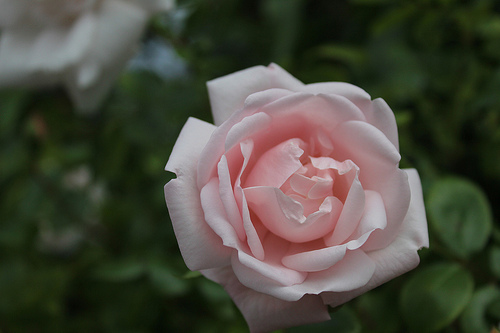

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

Preparing the data by specifying the image resolution and batch size.

Also, Splitting the dataset into training and validation datasets in 80:20 ratio.

In [ ]:
#Task-3:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


Plotting a sample image attributed to each class name present in the original dataset.

In [ ]:
#Task-4:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


Normalizing the data.

In [ ]:
#Task-5:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


Building a sequential model

In [ ]:
#Task-6:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compiling the model and printing model summary.

In [ ]:
#Task-7:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Training and validating the model.

In [ ]:

#Task-8:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 95s 1s/step - loss: 1.2553 - accuracy: 0.4601 - val_loss: 1.0286 - val_accuracy: 0.5668
Epoch 2/10
92/92 [==============================] - 89s 965ms/step - loss: 0.9549 - accuracy: 0.6294 - val_loss: 0.9150 - val_accuracy: 0.6403
Epoch 3/10
92/92 [==============================] - 88s 949ms/step - loss: 0.7758 - accuracy: 0.6969 - val_loss: 0.8660 - val_accuracy: 0.6567
Epoch 4/10
92/92 [==============================] - 89s 961ms/step - loss: 0.6045 - accuracy: 0.7728 - val_loss: 0.8517 - val_accuracy: 0.6757
Epoch 5/10
92/92 [==============================] - 88s 955ms/step - loss: 0.3801 - accuracy: 0.8644 - val_loss: 1.0224 - val_accuracy: 0.6567
Epoch 6/10
92/92 [==============================] - 88s 951ms/step - loss: 0.2320 - accuracy: 0.9257 - val_loss: 1.1651 - val_accuracy: 0.6608
Epoch 7/10
92/92 [==============================] - 89s 969ms/step - loss: 0.1091 - accuracy: 0.9673 - val_loss: 1.3961 - val_accuracy: 0.6662
Ep

Testing the model by feeding any flower image.

In [ ]:
#Task-9:
img = tf.keras.utils.load_img('/content/pexels-pixabay-69776.jpg', target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to tulips with a 100.00 percent confidence.
